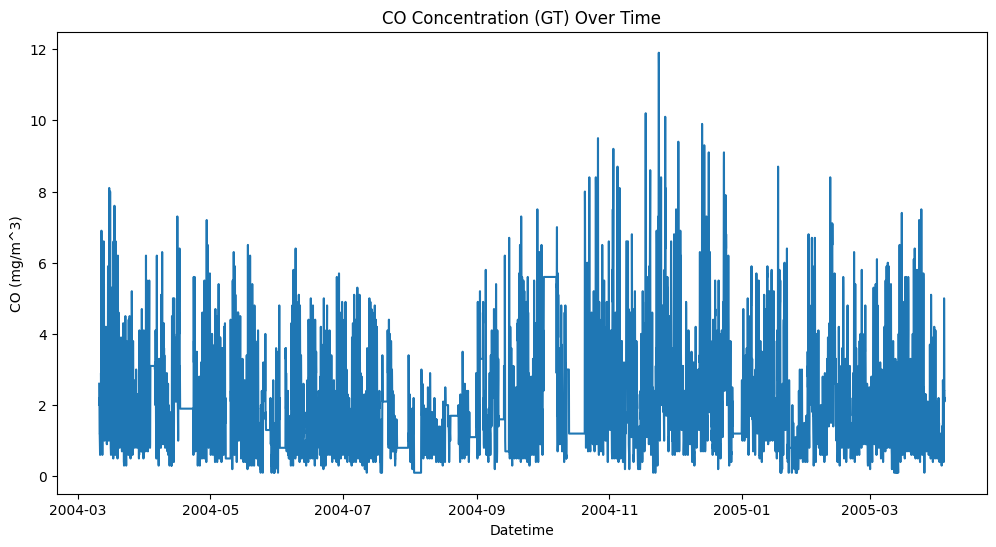


Model Evaluation:
Mean Squared Error: 0.359
R^2 Score: 0.844


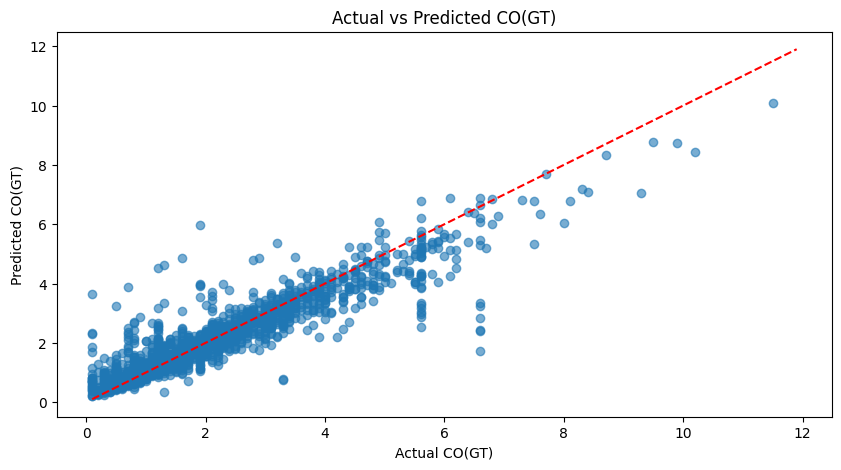

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Data (semicolon separated, last column is empty)
df = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
df = df.iloc[:, :-1]

# Combine 'Date' and 'Time' into a single datetime column
# Clean the Time column by replacing '.' with ':' before combining
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

# Now combine and parse
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)

# Drop original 'Date' and 'Time'
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Replace missing values (-200) with NaN and forward fill
df.replace(-200, np.nan, inplace=True)
df.ffill(inplace=True)

# Visualize CO(GT) over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='CO(GT)', data=df)
plt.title('CO Concentration (GT) Over Time')
plt.ylabel('CO (mg/m^3)')
plt.xlabel('Datetime')
plt.show()

# Feature Engineering
df['Month'] = df.index.month
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday

# Machine Learning Preparation
# Predict CO(GT) based on month, day, hour, and a few sensor inputs
features = ['Month', 'Day', 'Hour', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'T', 'RH']

# Ensure target variable is present AND remove rows with NaN in the features
df = df.dropna(subset=['CO(GT)'] + features)
X = df[features]
y = df['CO(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")

# Plot Predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs Predicted CO(GT)')
plt.show()

